## Perceptron Logical Gates

In this notebook we train a perceptron (just a single neuron) to solve logical gates. 

That means, e.g. for the AND gate, if we put in a 0 and a 1, the perceptron should output 0. It should only output 1 if the input was (1,1).

For the XOR gate, the Perceptron should return 1 if only one of the inputs was 1 and the other one 0 -->  (0,1) or (1,0). For (0,0) and (1,1) it should return 0.

And so on...

In [1]:
# Not using any tf libraries so far...
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
# Input to the network
x = np.array([[0,0],[0,1],[1,0],[1,1]])
# These are possible labels for some logical gates.
t_and = np.array([0,0,0,1])
t_or = np.array([0,1,1,1])
t_nand = np.array([1,1,1,0])
t_nor = np.array([1,0,0,0])
t_xor = np.array([0,1,1,0])

# Defining the activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Defining the derivative of activation function
def sigmoidprime(x):
    return sigmoid(x)*(1-sigmoid(x))
    

#### Implement Perceptron.

In [4]:
class Perceptron:
    
    def __init__(self, input_units):
        self.input_units = input_units
        
        # Initialize random weights and a random bias term 
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()
        # Define the learning rate as 1
        self.alpha = 1
        
        # Initialize variables to store input and drive
        self.inputs = 0
        self.drive = 0
        
    def forward_step(self, inputs):
        self.inputs = inputs
        # Calculate the drive
        self.drive = self.weights @ inputs + self.bias
        # Return the activation
        return sigmoid(self.drive)

        
    def update(self, delta):
        # This function updates the parameters for the perceptron

        # Compute the gradients for weights and bias
        gradient_weights = self.alpha * delta * self.inputs
        gradient_bias = self.alpha * delta
        # Update weights and bias
        self.weights -=  gradient_weights
        self.bias -= gradient_bias


In [24]:
class MLP:
    
    def __init__(self):
        # Initialize the perceptrons for the hidden layer
        self.hidden_layer = [
            Perceptron(input_units=2),
            Perceptron(input_units=2),
            Perceptron(input_units=2),
            Perceptron(input_units=2)
        ]
        # Initialize the output neuron
        self.output_neuron = Perceptron(input_units=4)
        # Initialize a variable to store the output
        self.output = 0
        
        
    def forward_step(self, inputs):
        # Compute the activation for the hidden layer
        activation_hid = np.array([p.forward_step(inputs) for p in self.hidden_layer])
        # Reshape the resulting array to feed it to the output neuron
        activation_hid = np.reshape(activation_hid, newshape=(-1))
        # Compute the activation of the output neuron
        self.output = self.output_neuron.forward_step(activation_hid)
        
        
    def backprop_step(self, inputs, target):
        # Compute the delta at the output neuron
        out_delta = - (target - self.output) * sigmoidprime(self.output_neuron.drive)
        # Update the parameters of  the output neuron
        self.output_neuron.update(out_delta)
        # Compute delta for the hidden neurons
        hid_delta = [out_delta * sigmoidprime(p.drive) * self.output_neuron.weights[i] for i, p in enumerate(self.hidden_layer)]
        # Update the parameters for all four neurons in the hidden layer.
        for i,p in enumerate(self.hidden_layer):
            p.update(hid_delta[i])

Note that we are **adding** the weights/biases, because we are using the Perceptron Learning rule and **not Gradient Descent**!

#### Perceptron Learning Rule Recap:
$$w_i^{new} = w_i^{old} + \Delta w_i  $$
$$\Delta w_i = \alpha*  (t-y) *x_i $$

#### Train on AND gate.

In [25]:
mlp = MLP()

# Initialize lists to store performance
step=[]
loss=[]
accuracy=[]

# Train the instance for 1000 epochs
for i in range(1000):
    step.append(i)
    
    accuracies = 0
    losses = 0
    
    # Training loop on "and" example
    for i in range(4):
        sample = x[i]
        label = t_and[i]
        
        
        # Perform a forward step with the given sample
        mlp.forward_step(sample)
        # Perform a backpropagation step with the given sample and target
        mlp.backprop_step(sample,label)
        # Train on a threshold equal to 0.5
        accuracies += int(float(mlp.output>=0.5) == label)
        # Loss function
        losses += (label-mlp.output)**2
        
    accuracy.append(accuracies/4.0)
    loss.append(losses)


#### Visualize training progress.

<IPython.core.display.Javascript object>


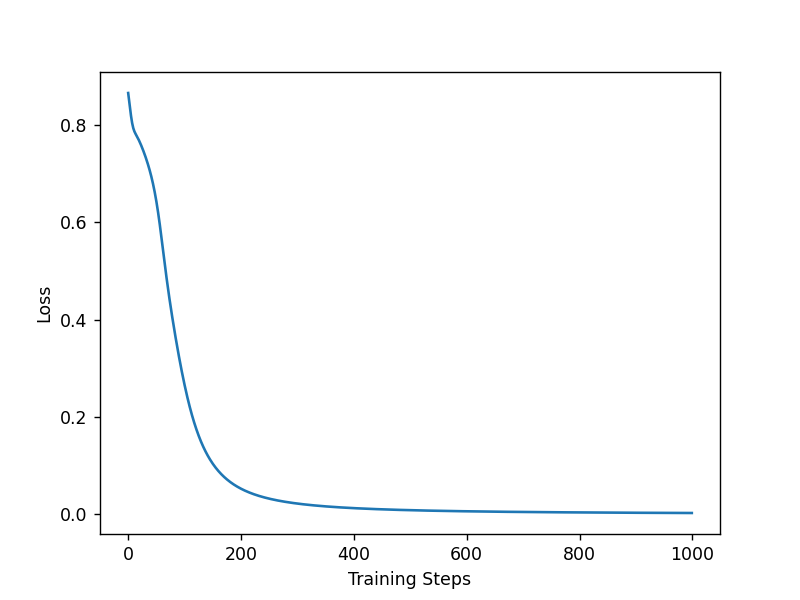

<IPython.core.display.Javascript object>


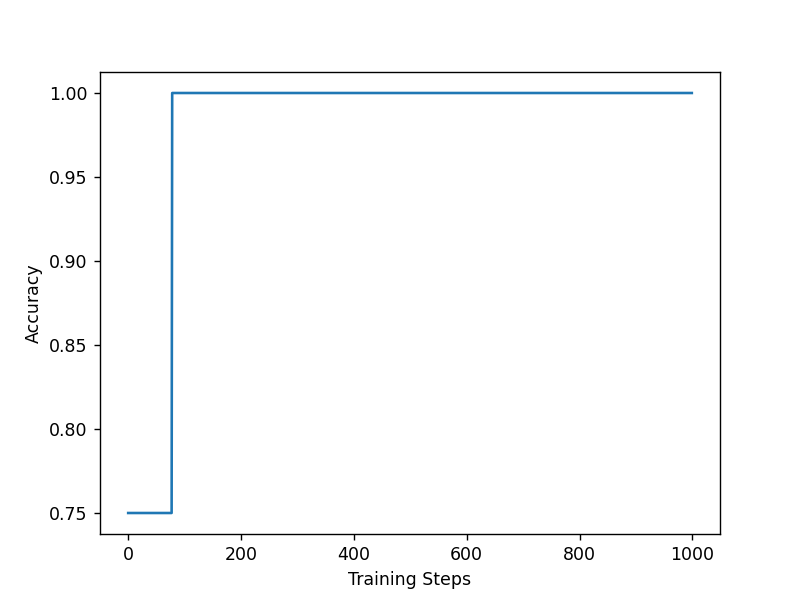

In [26]:
# Plot the training progress for Loss and Accuracy

plt.figure()
plt.plot(step, loss)
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(step,accuracy)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.show()

#### Train on XOR gate.

In [27]:
mlp = MLP()

# Initialize lists to store epochs, loss, accuracy
steps=[]
loss=[]
accuracy=[]

# Train the instance for 1000 epochs
for i in range(1000):
    steps.append(i)
    
    accuracies = 0
    losses = 0
    
    # Training loop on "xor" example
    for i in range(4):
        sample = x[i]
        label = t_xor[i]
        
        
        # Perform a forward step with the given sample
        mlp.forward_step(sample)
        # Perform a backpropagation step with the given sample and target
        mlp.backprop_step(sample,label)
        # Train on a threshold equal to 0.5. This turns true if the perceptron gave the right output (=> 0.5) --> then adds 1 
        accuracies += int(float(mlp.output>=0.5) == label)
        # Loss function
        losses += (label-mlp.output)**2
        
    accuracy.append(accuracies/4.0)
    loss.append(losses)

#### Visualize training progress.

<IPython.core.display.Javascript object>


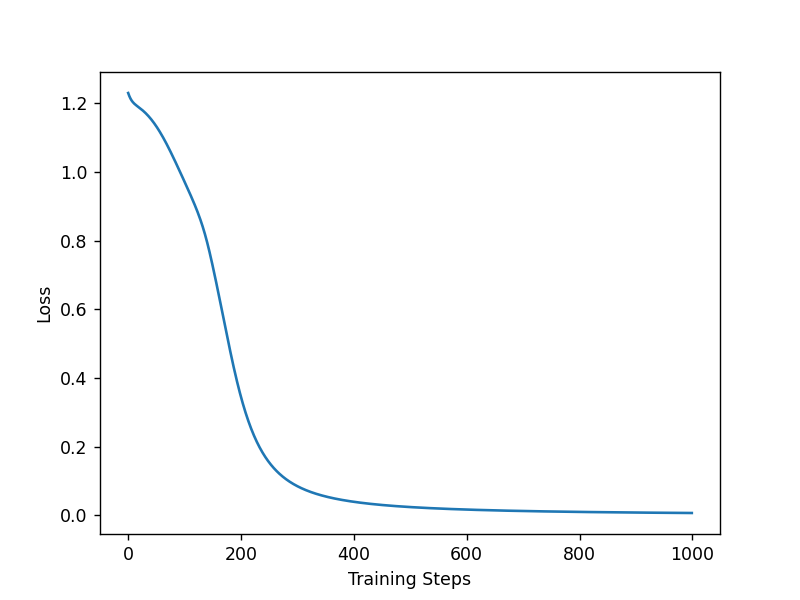

<IPython.core.display.Javascript object>


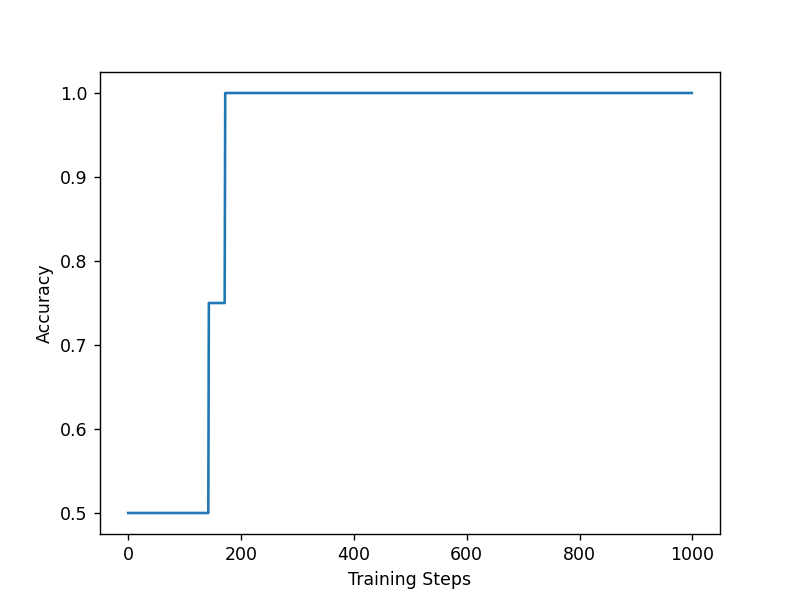

In [28]:
# Plot the training progress for Loss and Accuracy

plt.figure()
plt.plot(steps, loss)
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(steps,accuracy)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.show()